In [3]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 12.5 MB/s eta 0:03:17
     ---------------------------------------- 0.0/2.5 GB 11.3 MB/s eta 0:03:38
     ---------------------------------------- 0.0/2.5 GB 10.7 MB/s eta 0:03:50
     ---------------------------------------- 0.0/2.5 GB 10.9 MB/s eta 0:03:45
     ---------------------------------------- 0.0/2.5 GB 11.1 MB/s eta 0:03:41
     ---------------------------------------- 0.0/2.5 GB 11.2 MB/s eta 0:03:39
     ---------------------------------------- 0.0/2.5 GB 11.5 MB/s eta 0:03:33
     ---------------------------------------- 0.0/2.5 GB 11.5 MB/s eta 0:03:34
     ---------------------------------------- 0.0/2.5 GB 11.5 MB/s eta 0:03:34
     ---------------------------------------- 0.0/2.5 GB 11.5 MB/s eta 0:03:34
     ---------------------------------------- 0.0/2.5 GB 11.5 MB/s eta 0:03:33
 

In [4]:
import torch
print(torch.cuda.is_available())

True


In [6]:
import os
os.getcwd()

'c:\\workspace_project\\AIproject'

In [7]:
import os
import subprocess
os.chdir("C:/workspace_project/AIproject/TextRecognitionDataGenerator/trdg")

In [ ]:
# TextRecognitionDataGenerator 프로젝트를 이용해 한글 학습데이터 생성하기
# TextRecognitionDataGenerator 프로젝트 root에서 실행

# training: 100,00개
!python run.py \
        --output_dir "../.././workspace/step1/trainingpr" \
        --language "ko" \
        --count 10000

In [ ]:
import os
import shutil
import random

# 이미지 파일이 있는 디렉토리
src_dir = "../.././workspace/step1/trainingpr"

# 훈련 데이터와 검증 데이터를 저장할 디렉토리
train_dir = "../.././workspace/step1/trainingprt"
valid_dir = "../.././workspace/step1/validationprt"

# 디렉토리 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# 이미지 파일 목록 가져오기
files = os.listdir(src_dir)

# 파일 목록을 무작위로 섞기
random.shuffle(files)

# 80-20 비율로 나누기
split_idx = int(len(files) * 0.8)
train_files = files[:split_idx]
valid_files = files[split_idx:]

# 파일을 훈련 데이터와 검증 데이터 디렉토리로 이동
for file in train_files:
    shutil.move(os.path.join(src_dir, file), train_dir)

for file in valid_files:
    shutil.move(os.path.join(src_dir, file), valid_dir)

In [8]:
os.chdir('C:/workspace_project/AIproject/TRDG2DTRB')
os.getcwd()

'C:\\workspace_project\\AIproject\\TRDG2DTRB'

In [ ]:
# TRDG2DTRB 프로젝트를 이용해 한글 학습데이터 변환하기
# TRDG2DTRB 프로젝트 root에서 실행

# train 학습데이터 변환
!python3 convert.py \
        --input_path ".././workspace/step1/trainingprt" \
        --output_path ".././workspace/step2/trainingprt"

# validation 학습데이터 변환
!python3 convert.py \
        --input_path ".././workspace/step1/validationprt" \
        --output_path ".././workspace/step2/validationprt"

# # test 학습데이터 변환
# !python3 convert.py \
#         --input_path ".././workspace/step1/testprt" \
#         --output_path ".././workspace/step2/testprt"

In [9]:
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

'C:\\workspace_project\\AIproject\\deep-text-recognition-benchmark'

In [ ]:
# deep-text-recognition-benchmark 프로젝트에서 사용할 학습데이터 포맷으로의 변환
# deep-text-recognition-benchmark 프로젝트 root에서 실행

# training 데이터 변환
!python3 create_lmdb_dataset.py \
        --gtFile ".././workspace/step2/trainingprt/gt.txt" \
        --inputPath ".././workspace/step2/trainingprt" \
        --outputPath ".././workspace/step3/trainingprt"

# validation 데이터 변환
!python3 create_lmdb_dataset.py \
        --gtFile ".././workspace/step2/validationprt/gt.txt" \
        --inputPath ".././workspace/step2/validationprt" \
        --outputPath ".././workspace/step3/validationprt"

# # test 데이터 변환
# !python3 create_lmdb_dataset.py \
#         --gtFile ".././workspace/step2/testprt/gt.txt" \
#         --inputPath ".././workspace/step2/testprt" \
#         --outputPath ".././workspace/step3/testprt"

In [ ]:
# # deep-text-recognition-benchmark 프로젝트를 이용한 모델 학습
# # deep-text-recognition-benchmark 프로젝트 root에서 실행
# ! python3 train.py \
#         --train_data ".././workspace/step3/trainingprt" \
#         --valid_data ".././workspace/step3/validationprt" \
#         --select_data / \
#         --batch_ratio 1 \
#         --Transformation None  \
#         --FeatureExtraction "VGG" \
#         --SequenceModeling "BiLSTM" \
#         --Prediction  "CTC" \
#         --input_channel 1 \
#         --output_channel 256 \
#         --hidden_size 256 \
#         --saved_model ".././workspace/pre_trained_model/korean_g2.pth" \
#         --FT

In [ ]:
# deep-text-recognition-benchmark 프로젝트를 이용한 모델 학습
# deep-text-recognition-benchmark 프로젝트 root에서 실행
! python3 train.py \
        --train_data ".././workspace/step3/trainingprt" \
        --valid_data ".././workspace/step3/validationprt" \
        --select_data / \
        --batch_ratio 1 \
        --Transformation None  \
        --FeatureExtraction "VGG" \
        --SequenceModeling "BiLSTM" \
        --Prediction  "CTC" \
        --input_channel 1 \
        --output_channel 256 \
        --hidden_size 256 \
        --saved_model ".././workspace/pre_trained_model/korean_g2.pth" \
        --FT

3.4 모델 테스트

In [10]:
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

'C:\\workspace_project\\AIproject\\deep-text-recognition-benchmark'

In [ ]:
! python3 demo.py \
        --Transformation  None \
        --FeatureExtraction VGG \
        --SequenceModeling BiLSTM \
        --Prediction CTC \
        --image_folder demo_image/ \
        --saved_model ./saved_models/None-VGG-BiLSTM-CTC-Seed1111/best_accuracy.pth

4. 모델 사용하기

In [ ]:
! git clone https://github.com/JaidedAI/EasyOCR.git


In [11]:
import os
os.chdir('C:/workspace_project/AIproject/EasyOCR')

In [19]:
!python run.py

filename: '01.jpg', confidence: 0.0954, string: 'G'
filename: '01.jpg', confidence: 0.0008, string: '셈책'
filename: '01.jpg', confidence: 0.0316, string: '부 '
filename: '01.jpg', confidence: 0.3852, string: '2022-0-28 0:18*51'
filename: '01.jpg', confidence: 0.3204, string: '(2022-04-28)'
filename: '01.jpg', confidence: 0.0002, string: '(T빠빠하m'
filename: '01.jpg', confidence: 0.0358, string: '매로(빠'
filename: '01.jpg', confidence: 0.3426, string: '전화: 0-2286-67689'
filename: '01.jpg', confidence: 0.8226, string: '010-9135-8455'
filename: '01.jpg', confidence: 0.0405, string: '청명화 5총 가A열 $8 홍@호'
filename: '01.jpg', confidence: 0.1018, string: 'kakao story ;marshsgg'
filename: '01.jpg', confidence: 0.3505, string: '상품명'
filename: '01.jpg', confidence: 0.1013, string: '민가'
filename: '01.jpg', confidence: 0.9973, string: '수량'
filename: '01.jpg', confidence: 0.9559, string: '금액'
filename: '01.jpg', confidence: 0.0172, string: '타입컷량반말크림'
filename: '01.jpg', confidence: 0.8700, string: '17000'


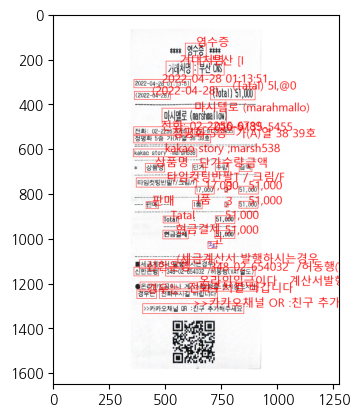

['영수증', '거대처명', '부산 [I', '2022-04-28 01:13:51', '(2022-04-28)', '(Tatal) 5l,@0', '마시델로 (marahmallo)', '전화: 02-2256-6789', '010-9135-5455', '청평화 5총  가(A)열 38 39호', 'kakao story ;marsh538', '상품명', '단가', '수량', '금액', '타임컷팅반팔T / 크림/F', '17,000', '3', '51,000', '판매', 'l품', '3', '51,000', 'Tatal', '51,000', '현금결제', '51,000', '고', '(세금계산서 발행하시는경우', '신한은행', '348-02-654032  /허동행(VAT별도)', '온라인입금이다   계산서발행울 원치않으시논', '경우는', '전화주시길 바갑니다', '>>카카오채널 OR :친구 추가해주세요']


In [26]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(["ko", "en"], gpu=True)
result = reader.readtext(
    "C:/workspace_project/AIproject/workspace/demo_images/01.jpg"
)
result2 = reader.readtext(
    "C:/workspace_project/AIproject/workspace/demo_images/01.jpg",
    detail=0,
)

img = cv2.imread(
    "C:/workspace_project/AIproject/workspace/demo_images/01.jpg"
)

img = Image.fromarray(img)

font = ImageFont.truetype('C:/Windows/Fonts/malgun.ttf', 50)

draw = ImageDraw.Draw(img)

for i in result:
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]

    draw.rectangle(((x, y), (x + w, y + h)), outline="red", width=2)
    draw.text((int((x + x + w) / 2), y - 40), str(i[1]), font=font, fill="red")

plt.imshow(img)
plt.show() 
# 결과를 줄바꿈으로 구분하여 출력
print(result2)

In [27]:
os.chdir('C:/workspace_project/AIproject/ocr-preprocessor-main')

In [ ]:
!python main.py

In [29]:
import os
os.chdir('C:/workspace_project/AIproject/EasyOCR')

In [30]:
!python run.py

filename: '01.jpg', confidence: 0.0954, string: 'G'
filename: '01.jpg', confidence: 0.0008, string: '셈책'
filename: '01.jpg', confidence: 0.0316, string: '부 '
filename: '01.jpg', confidence: 0.3852, string: '2022-0-28 0:18*51'
filename: '01.jpg', confidence: 0.3204, string: '(2022-04-28)'
filename: '01.jpg', confidence: 0.0002, string: '(T빠빠하m'
filename: '01.jpg', confidence: 0.0358, string: '매로(빠'
filename: '01.jpg', confidence: 0.3426, string: '전화: 0-2286-67689'
filename: '01.jpg', confidence: 0.8226, string: '010-9135-8455'
filename: '01.jpg', confidence: 0.0405, string: '청명화 5총 가A열 $8 홍@호'
filename: '01.jpg', confidence: 0.1018, string: 'kakao story ;marshsgg'
filename: '01.jpg', confidence: 0.3505, string: '상품명'
filename: '01.jpg', confidence: 0.1013, string: '민가'
filename: '01.jpg', confidence: 0.9973, string: '수량'
filename: '01.jpg', confidence: 0.9559, string: '금액'
filename: '01.jpg', confidence: 0.0172, string: '타입컷량반말크림'
filename: '01.jpg', confidence: 0.8700, string: '17000'
